In [611]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv, kv
import scipy.integrate as integrate
n = 10
k0 = 0
k1 = 52
r0 = 6
r1 = 9.2
H = 7
f = lambda x: -x**2+H*x
ru = np.linspace(0, r0, 120)
rv = np.linspace(r0, r1, 120)
z = np.linspace(0, H, 30)

In [612]:
def u(r, z):
    res = 0
    for k in range(n):
        ak = np.pi*(2*k+1)/H
        fk = integrate.quad(lambda x: f(x)*np.sin(ak*x), 0, H)[0]
        p = 0
        p += iv(0, ak*r)
        p /= iv(0, ak*r1)
        p *= np.sin(ak*z)
        p *= fk
        
        res += p
    
    res *= 2/H
    return res

In [613]:
def v(r, z):
    res = 0
   
    for k in range(n):
        ak = np.pi*(2*k+1)/H
        fk = integrate.quad(lambda x: f(x)*np.sin(ak*x), 0, H)[0]
        p0 = 0
        p1 = 0
        ak_r0 = ak*r0
        ak_r1 = ak*r1
        ak_r = ak*r
        ak_z = ak*z
        
        p0 += iv(0, ak_r) 
        p0 /= iv(0, ak_r1)   
        p0 *= k0/k1
        p0 *= fk
        
        p1 += ak_r0*fk*iv(0, ak_r0)/iv(0, ak_r1)
        p1 *= kv(1, ak_r0)*iv(0, ak_r)+iv(1, ak_r0)*kv(0, ak_r)
        p1 *= (k1-k0)/k1 
            

        
        res += (p0+p1)*np.sin(ak_z) 
    
    res *= 2/H
    return res

Text(0.5, 0, 'Res')

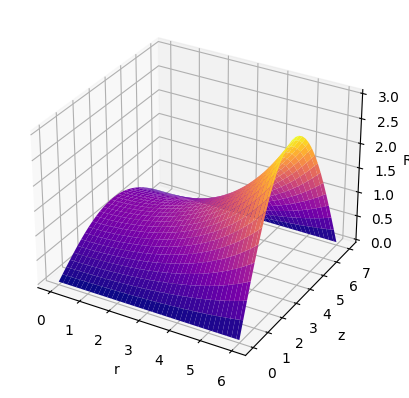

In [614]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ru_p, zu_p = np.meshgrid(ru, z)
resu1 = u(ru_p, zu_p)
# Построение графика
ax.plot_surface(ru_p, zu_p, resu1, cmap='plasma')

# Настройка осей и меток
ax.set_xlabel('r')
ax.set_ylabel('z')
ax.set_zlabel('Res')

Text(0.5, 0, 'Res')

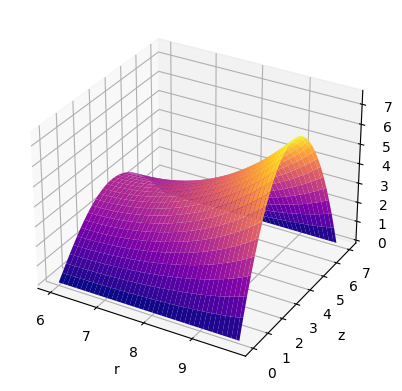

In [615]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rv_t, zv = np.meshgrid(rv, z)

resv = v(rv_t, zv)
# Построение графика
ax.plot_surface(rv_t, zv, resv, cmap='plasma')

# Настройка осей и меток
ax.set_xlabel('r')
ax.set_ylabel('z')
ax.set_zlabel('Res')

Text(0.5, 0, 'Res')

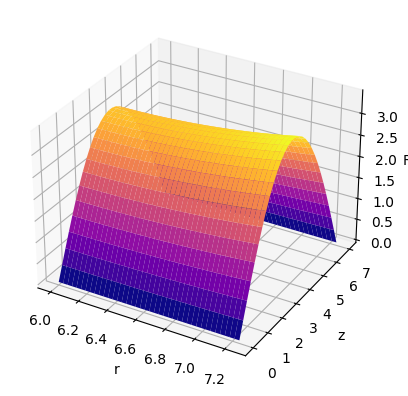

In [616]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rv_t, zv = np.meshgrid(rv, z)

resv = v(rv_t, zv)
# Построение графика
ax.plot_surface(rv_t[:, :40], zv[:, :40], resv[:, :40], cmap='plasma')

# Настройка осей и меток
ax.set_xlabel('r')
ax.set_ylabel('z')
ax.set_zlabel('Res')

Text(0.5, 0, 'Res')

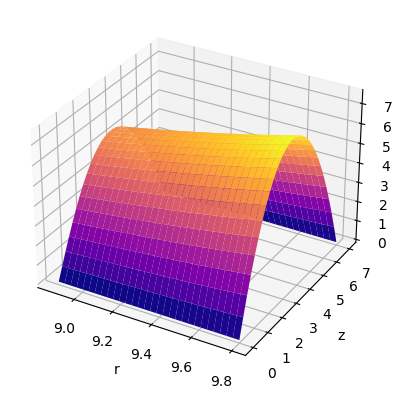

In [617]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rv_t, zv = np.meshgrid(rv, z)

resv = v(rv_t, zv)
# Построение графика
ax.plot_surface(rv_t[:, 90:], zv[:, 90:], resv[:, 90:], cmap='plasma')

# Настройка осей и меток
ax.set_xlabel('r')
ax.set_ylabel('z')
ax.set_zlabel('Res')

In [618]:
v(10.42, 4)

9.229540385663368